# Fraud Detection with Supervised Learning <a class="tocSkip">
**A personal project**

**Author: Carl Cheng** 

**YY-MM: 2022-August**

# Table of Contents <a class="tocSkip">
* [Section 1: Introduction](#Introduction)
* [Section 2: Data Preparation](#Data-Preparation)
    * [Section 2.1: Exploratory Data Analysis - EDA](#Exploratory-Data-Analysis---EDA)
        * [Understand the Dataset](#Understand-the-Dataset)
        * [Inspect for outliers](#Inspect-for-outliers)
* [Section 3: Preprocessing](#Preprocessing)
    * [Section 3.1: Issues need to be addressed](#Issues-need-to-be-addressed)
    * [Section 3.2: Activities to add into the workflow](#Activities-need-to-add-into-the-workflow)
        * [Undersampling and Oversampling](#Undersampling-and-Oversampling)
        * [Scaling](#Scaling)
        * [Cross Validation](#Cross-Validation)
    * [Section 3.3: Import More Packages](#Import-More-Packages)
* [Section 4: Building Models](#Build-Machine-Learning-Models)
    * [Section 4.1: First Approach](#First-Approach)
        * [Modeling with Oversampling Method](#Modeling-with-Oversampling-Method)
    * [Section 4.2: Second Approach](#Second-Approach)
        * [Baseline Test & Evaluation Metrics](#Baseline-Test-&-Evaluation-Metrics)
             * [Why is recall important?](#Why-is-recall-important?)
             * [Random forest - accuracy/recall](#Random-forest---accuracy/recall)
             * [Logistic regression - accuracy/recall](#Logistic-regression---accuracy/recall)
        * [Modeling with Oversampling](#Modeling-with-Oversampling)
    * [Section 4.3: Tuning the Hyperparameters](#Tuning-the-Hyperparameters)
* [Section 5: PR-Curve and ROC-AUC](#PR-curve-and-ROC-AUC)
    * [Section 5.1: PR curve](#PR-curve)
    * [Section 5.2: ROC curve and AUC](#ROC-curve-and-AUC)
* [Section 6: Conclusion](#Conclusion)
* [Section 7: Final Thoughts](#Final-Thoughts)

# Introduction

This is a personal project aimed at finding the best supervised learning settings for the given labeled credit card fraud dataset. This project was inspired by my own interest in fraud detection, so I decided to create my own pet project based on it, and along the way I used many helpful resources and tips online and in the book to construct my line of thought and the analysis process. The data was collected from Kaggle (source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud), and it will also be posted on my Github under this project's repository.

# Data Preparation

## Exploratory Data Analysis - EDA
### Understand the Dataset

**Summary**
* Most of the features (V1, V2, V3, ... V28) have no explicit information that we can feature engineering due to confidentiality issues.
* Except for "time" and "amount," all features had been scaled.
* The majority of the transcations happened in the amount range of 5.60 to 77.16, which is the 25th and 75th percentile, respectively.
* There are no null values, which saved us time during data cleaning.
* Most of the transactions, as expected, are non-fraudulent. Non-frauds make 99.83% of the dataset, and frauds only make 0.17% of the dataset. They are extremely imbalanced.


In [4]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#loading the data
df = pd.read_csv("creditcard_Kg.csv")

#Understanding the basic structure of the data with head, shape, info, and describe.
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Shape of the data
df.shape

(284807, 31)

In [4]:
#Datatypes and completeness of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#Check the distribution of numerical values for each attribute
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

# Print the ratio of fraud cases
print(occ / len(df.index))

0    284315
1       492
Name: Class, dtype: int64
0    0.998273
1    0.001727
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

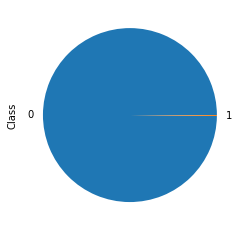

In [7]:
#Plot them by pie chart
(occ / len(df.index)).plot.pie()

In [8]:
#The distribution is heavily skewed towards non-fraud.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0, 0.5, 'Dollar')

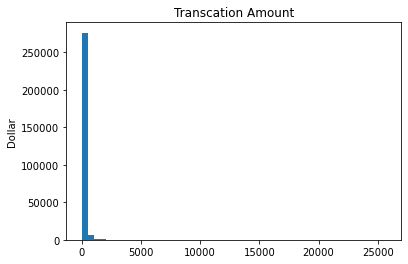

In [9]:
#Distribution of transcation amount
plt.hist(df['Amount'], bins=50)
plt.title('Transcation Amount')
plt.ylabel('Dollar') #Assuming its a NA dataset

### Inspect for outliers
After inspecting the dataset, it leaves us with two columns: Time and Amount in its orignal form. Thus, we must scale the columns just as the other columns, but before doing so, we should take a look at the distribution of the two attributes, individually.

**Summary**
* There are few outliers in "Amount" column
* "Time" has little to none outliers spotted.

<AxesSubplot:xlabel='Time'>

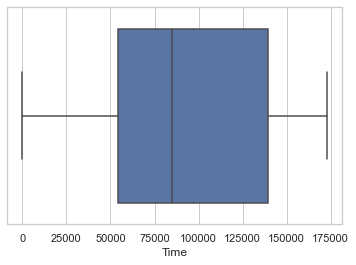

In [10]:
#spot the outliers
import seaborn as sns
sns.set_theme(style='whitegrid')
sns.boxplot(x=df['Time'], fliersize=5) #creat a boxplot

<AxesSubplot:xlabel='Time', ylabel='Count'>

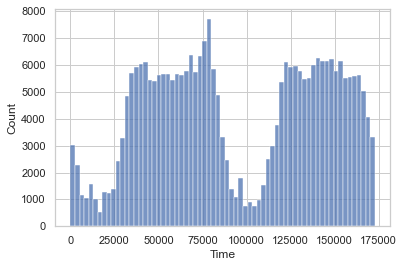

In [11]:
sns.histplot(data=df['Time'])

In [12]:
df.sort_values(by='Time',ascending=False)[['Time','Class']].iloc[:10]

,Time,Class
284806,172792.0,0
284805,172788.0,0
284804,172788.0,0
284803,172787.0,0
284802,172786.0,0
284801,172785.0,0
284800,172784.0,0
284799,172783.0,0
284798,172782.0,0
284797,172782.0,0


In [13]:
df.sort_values(by='Time',ascending=False)[['Time','Class']].tail(10)

,Time,Class
9,9.0,0
8,7.0,0
7,7.0,0
6,4.0,0
4,2.0,0
5,2.0,0
2,1.0,0
3,1.0,0
1,0.0,0
0,0.0,0


<AxesSubplot:xlabel='Amount'>

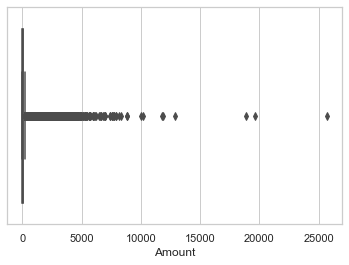

In [14]:
sns.boxplot(x=df['Amount'], fliersize=5)

<AxesSubplot:xlabel='Amount', ylabel='Count'>

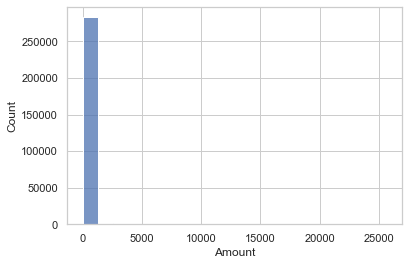

In [15]:
sns.histplot(data=df['Amount'], bins=20)

In [16]:
#Let's inspect the ten largest transcations and their corresponding class.
df.sort_values(by='Amount',ascending=False)[['Amount','Class']].iloc[:10]

,Amount,Class
274771,25691.16,0
58465,19656.53,0
151296,18910.00,0
46841,12910.93,0
54018,11898.09,0
169457,11789.84,0
284249,10199.44,0
227921,10000.00,0
74699,8790.26,0
245474,8787.00,0


In [17]:
#What about ten smallest?
df.sort_values(by='Amount',ascending=False)[['Amount','Class']].tail(10)

,Amount,Class
247888,0.0,0
10307,0.0,0
265658,0.0,0
92049,0.0,0
28629,0.0,0
242261,0.0,0
231211,0.0,0
207747,0.0,0
190081,0.0,0
8346,0.0,0


# Preprocessing

## Issues need to be addressed
* Imbalanced class --- to be targeted with undersampling or oversampling
* Non-scaled "Time" and "Amount" --- to be targeted with scaling

## Activities need to add into the workflow
* Undersampling or Oversampling
* Scale "Time" and "Amount" like rest of the features
* Cross Validation

### Undersampling and Oversampling
Now there are two options to solve the imbalanced class problem, undersampling and oversampling. At first glance, undersampling by trimming down non-fraud data might be a "wise" choice since we have big surplus of non-fraud data. However, training on a fraud and non-fraud ratio of 50/50 can lead to bias, meaning the model likely will not perform well with unseen data. One of the reason being, with random undersampling when events are removed without any consideration for what they are, we risk of losing potentially important data.

In order to leverage as much data as possible, with no observations wasted, we will approach resolving the imbalance problem with oversampling - use SMOTE. A common mistake is SMOTEing before spliting into training and validation(test) datasets, this will lead to serious data leak - contaminate your testing data.

Pros and Cons of random undersampling and oversampling
* Random undersampling
    * Pros:
        * Less run time
        * Avoid accuracy paradox
    * Cons:
        * Information loss
        * May lead to bias - sample does not represent the real world
       
       
* Oversampling
    * Pros:
        * No information loss
        * Reduce bias
        * Arguably, improve validity - repeatable test
    * Cons:
        * Long run time
        * Prone to overfit

### Scaling
It is the best practice to scale after train-test split, however, tree-based classifier like random forest does not benifit from scaling. Thus, we will only apply scaler for logistic regression.

### Cross Validation
Before proceeding to fix the imbalance issue and scaling issue, we need to split the dataset into training and testing set, becasue we need the testing dataset to remain "clean". Since we have a relatively large dataset, meaning plenty of room to work with, adding leverage K-fold cross validation to observe performance variations will be beneficial to the analysis. Given the imbalanced class distribution, we prefer StratifiedKFold over KFold here. 

## Import More Packages

In [2]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, average_precision_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score

# Build Machine Learning Models

## First Approach

### Modeling with Oversampling Method
**Summary**
* Logisitc regression and random forest performs, accuracy-wise, relatively close.
* Both models seem to have high accuracy, meaning the model is predicting a good number of correct classes but is it really meaningful for fraud detection with imbalanced class? The answer is not so much. It will be explained later.

In [19]:
#Define X and y from dataframe as numpy array
X = np.array(df.drop('Class', axis=1)) #drop Class column
y = np.array(df['Class'])

#create a function to produce scores
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

#Define the paremeters of the Stratified k-flod to prepare for cross-validation

#Here we keep shuffle as True. 
#You will see if we keep shuffle false the testing set will have a ascending index pattern,
#which creates bias in our validation results.
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True) 

#Creat empty list to store scores
scores_logistic = []
scores_rf = []

Why is it important to leave shuffle True?

In [98]:
#shuffle is True
skf_test = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in skf_test.split(X, y):
    print("Train:", train_index, "Test:", test_index)

Train: [     0      1      2 ... 284804 284805 284806] Test: [     5      7      9 ... 284778 284793 284799]
Train: [     0      3      4 ... 284804 284805 284806] Test: [     1      2     13 ... 284792 284797 284801]
Train: [     1      2      5 ... 284800 284801 284803] Test: [     0      3      4 ... 284804 284805 284806]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    14     19     27 ... 284795 284796 284800]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    11     15     22 ... 284791 284794 284803]


In [100]:
#if shuffle is False. Not very good if we look at the index sequence. They are not randomly selected.
skf_test = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in skf_test.split(X, y):
    print("Train:", train_index, "Test:", test_index)

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [101]:
len(train_index)

227846

In [102]:
len(test_index)

56961

Terms to known before moving forward:
* True Positive (TP): Also known as sensitivity, TP means that a positive prediction was given, and it was true. 
* True Negative (TN): Also known as specificity, TN means that a negative prediction was given, and it was true. 
* False Positive (FP): Also known as Type-I error, an FP prediction is positive, but the actual value was negative. 
* False Negative (FN): Also known as Type-II error, an FN prediction is negative, but the actual value was positive. 

In sklearn, confusion matrix:

        [TN, FP]
        
        [FN, TP]
    

In [104]:
#logisticRegression
for train_index, test_index in skf.split(X, y):
    
    #define the oversampler
    sm = SMOTE(sampling_strategy='minority',random_state=42)
    
    #Split the training and testing data
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    #Oversampling with SMOTE
    X_train, y_train = sm.fit_resample(X_train, y_train)
    
    #Scaling with RobustScaler, less prone to be effected by outliers
    scaler = RobustScaler()
    
    #Only scale column "Time" and "Amount" - column index 0 and -1.
    X_train[:,[0, -1]] = scaler.fit_transform(X_train[:,[0, -1]]) 
    X_test[:,[0, -1]] = scaler.transform(X_test[:,[0, -1]])
    
    clf_1 = LogisticRegression(max_iter=1000)
    #Get the scores by using the predefined get_score function
    scores_logistic.append(get_score(clf_1, X_train, X_test, y_train, y_test))  
    
    predicted = clf_1.predict(X_test)

    # Print the classifcation report and confusion matrix
    print('LR Classification report:\n', classification_report(y_test, predicted))
    conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
    print('LR Confusion matrix:\n', conf_mat)

LR Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.17      0.84      0.28        99

    accuracy                           0.99     56962
   macro avg       0.58      0.92      0.64     56962
weighted avg       1.00      0.99      0.99     56962

LR Confusion matrix:
 [[56443   420]
 [   16    83]]
LR Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.15      0.93      0.25        99

    accuracy                           0.99     56962
   macro avg       0.57      0.96      0.62     56962
weighted avg       1.00      0.99      0.99     56962

LR Confusion matrix:
 [[56328   535]
 [    7    92]]
LR Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.15      0.91      0.26       

In [20]:
#RandomForest
for train_index, test_index in skf.split(X, y):
    
    #define the oversampler
    sm = SMOTE(sampling_strategy='minority',random_state=42)
    
    #Split the training and testing data
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    #Oversampling with SMOTE
    X_train, y_train = sm.fit_resample(X_train, y_train)
    
    rf_1 = RandomForestClassifier(n_estimators=100)
    #Get the scores by using the predefined get_score function 
    scores_rf.append(get_score( rf_1, X_train, X_test, y_train, y_test))
    
    predicted = rf_1.predict(X_test)

    # Print the classifcation report and confusion matrix
    print('RF Classification report:\n', classification_report(y_test, predicted))
    conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
    print('RF Confusion matrix:\n', conf_mat)

RF Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.80      0.83        99

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962

RF Confusion matrix:
 [[56850    13]
 [   20    79]]
RF Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.92      0.86      0.89        99

    accuracy                           1.00     56962
   macro avg       0.96      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962

RF Confusion matrix:
 [[56856     7]
 [   14    85]]
RF Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.84      0.88       

In [108]:
X_train[:,[0,-1]]

array([[-0.88981147,  1.2926045 ],
       [-0.88981147, -0.23140753],
       [-0.88980022,  3.66829167],
       ...,
       [-0.12228469, -0.24893683],
       [ 0.67812634,  0.32714934],
       [-0.79052138, -0.24893683]])

In [109]:
print("LR scores: "+ str(scores_logistic))

LR scores: [0.9923457743758998, 0.9904848846599488, 0.9911167289900107, 0.9910991731184494, 0.9907831674303471]


In [21]:
print("RF scores: "+ str(scores_rf))

RF scores: [0.999420666409185, 0.9996313331694814, 0.9996137708256526, 0.9995435473394076, 0.9995084355962852]


In [111]:
#look at class 1 distribution
np.count_nonzero(y_train)

227452

In [112]:
#look at class 0 distribution
len(y_train)-np.count_nonzero(y_train)

227452

We saw an equal number of observations from each class in the training set. Clearly, SMOTE did its job by creating synthetic fraud class observations. Fraud and non-fraud has reached to 1:1.

But using for loops make it difficult to extract information of what has happened within. Plus, the entrie code is not modulated enough which leads to low efficicency and does not benifict the reader in any way. It is time to abandon **for loops** and start to use **pipeline(s)**.

## Second Approach

Start from the scratch.

### Baseline Test & Evaluation Metrics

In the baseline test, since we are dealing with imbalance data, accuracy is not the best performance metric here. Reporting classification accuracy for a severely imbalanced classification problem could be dangerously misleading. The reason is, a high accuracy (or low error) is achievable by a no skill model that only predicts the majority class. So we should instead focus on recall or precision.

#### Why is recall important?
Imagine you are a large bank. In America, if a transaction is fraudulent, banks generally have to cover that transaction.

* Assumptions: False negative is more costly.
* **Our goal: Increase recall score as much as possible without overcompensating on the cost of precision. (target precision >= 0.70)**

**Summary**
* Random forest and logistic regression yield similar **accuracy** scores as expected.
* However, **random forest** has gained advantage over logistic regression on scoring recall. Random forest is the clear winner here in terms of recall.
* The baseline recall score is **0.75** for **random forest classification**.


#### Random forest - accuracy/recall

In [6]:
#define X and y
X = df.drop('Class', axis=1) #drop Class column
y = df['Class']

In [8]:
#set up train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)

In [10]:
#define cv and classifier
kf = StratifiedKFold(n_splits=5)
rf = RandomForestClassifier(n_estimators=100, random_state=13)

In [103]:
#use cross_val_score to score for accuracy
cross_val_score(rf, X_train, y_train, cv=kf, scoring='accuracy')

array([0.99957866, 0.99953185, 0.99946162, 0.99941481, 0.99953185])

In [107]:
#confusion matrix
rf.fit(X_train, y_train)
predicted = rf.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71064
           1       0.94      0.83      0.88       138

    accuracy                           1.00     71202
   macro avg       0.97      0.91      0.94     71202
weighted avg       1.00      1.00      1.00     71202

Confusion matrix:
 [[71057     7]
 [   24   114]]


In [104]:
# score for recall
cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')

array([0.77142857, 0.76056338, 0.76056338, 0.71830986, 0.74647887])

In [105]:
recall_array = np.array([0.77142857, 0.76056338, 0.76056338, 0.71830986, 0.74647887])

In [108]:
print("Average recall score = "+ str(np.mean(recall_array)))

Average recall score = 0.7514688119999999


We are reaching a recall score of 0.75 with the random forest apprach.

#### Logistic regression - accuracy/recall

In [11]:
from sklearn.compose import ColumnTransformer

clf = LogisticRegression(max_iter=1000)

scaler = ColumnTransformer([('RobustScaler', 
                              RobustScaler(),
                             ['Time', 'Amount']
                            )], remainder='passthrough')

clf_pipeline = make_pipeline(scaler, clf)
print(cross_val_score(clf_pipeline, X_train, y_train, cv=kf, scoring='accuracy'))

[0.99911051 0.99925095 0.99920414 0.99901688 0.99904028]


In [13]:
scaler = ColumnTransformer([('RobustScaler', 
                              RobustScaler(),
                             ['Time', 'Amount']
                            )], remainder='passthrough')
transformer = scaler.fit(X_train)
X_test_scaled = transformer.transform(X_test)
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('RobustScaler',
                                                  RobustScaler(),
                                                  ['Time', 'Amount'])])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [14]:
X_test_scaled = pd.DataFrame(data=X_test_scaled, index=np.arange(len(X_test_scaled)), columns=X_test.columns)

In [15]:
predicted = clf.predict(X_test_scaled)

In [16]:
# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71064
           1       0.93      0.64      0.76       138

    accuracy                           1.00     71202
   macro avg       0.96      0.82      0.88     71202
weighted avg       1.00      1.00      1.00     71202

Confusion matrix:
 [[71057     7]
 [   50    88]]


In [74]:
print(cross_val_score(clf_pipeline, X_train, y_train, cv=kf, scoring='recall'))

[0.58571429 0.63380282 0.57746479 0.56338028 0.53521127]


In [85]:
print("Average recall score = "+ str(np.mean([0.58571429, 0.63380282, 0.57746479, 0.56338028, 0.53521127])))

Average recall score = 0.57911469


We are reaching a recall score of 0.58 with the logistic regression approach.

Move forward with random forest classifier.

### Modeling with Oversampling
Oversampling before cross validation can post numerious problems such as data leaks and overfitting. Instead, we should split into training and testing folds, then run oversampling, training, and testing on each fold.

More details on cross-validation and upsampling can be found in this github post:https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html

**Summary**
* The recall score improved from **0.75** to **0.81** after SMOTE.

In [82]:
#let's empoly imblearn's built-in pipeline method here.
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              RandomForestClassifier(n_estimators=100))
cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kf)

array([0.84285714, 0.81690141, 0.81690141, 0.74647887, 0.81690141])

In [166]:
np.mean([0.84285714, 0.81690141, 0.81690141, 0.74647887, 0.81690141])

0.8080080479999999

*Use cross_validate instead to check all other targets: f1, precision, accuracy.

In [174]:
scores=cross_validate(imba_pipeline, X_train, y_train, scoring = ('f1', 'recall','precision','accuracy'), cv=5)

In [178]:
print(np.mean(scores['test_recall']))

0.8080080482897385


In [179]:
print(np.mean(scores['test_precision']))

0.8699913480334903


In [180]:
print(np.mean(scores['test_f1']))

0.8376783479300138


In [181]:
print(np.mean(scores['test_accuracy']))

0.9994803492427611


## Tuning the Hyperparameters
The following hyperparameter tuning aim to optimize on **recall** over the random forest model. GridSearchCV will help us find the best hyperparameters.

**Summary**
* **GridSearchCV** is able to secure a best setting which scores **0.86 on recall**.
* We are able to improve the number of false negitaves from **24 to 19**, while keeping precision relatively low. Since the recall and precision trade-off, it is very difficult to improve both as the same time.

First try GridSearchCV model selector to look for best hyperparameters. Set scoring target to recall.

In [206]:
params ={'n_estimators': [10, 25, 50, 100, 150],
 'max_depth': [4, 6, 10, 12, 14],
 'random_state': [13]}

In [208]:
#Include GridSearchCV into the imb pipeline loop
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring=('recall'),
                        return_train_score=True)
grid_imba.fit(X_train, y_train);

In [239]:
grid_imba.best_params_

{'randomforestclassifier__max_depth': 14,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__random_state': 13}

In [210]:
grid_imba.best_score_

0.864507042253521

As scoring set to recall, the GridSearchCV provides the best setup:

 'randomforestclassifier__max_depth': 6,
 
 'randomforestclassifier__n_estimators': 100,
 
 'randomforestclassifier__random_state': 13

In [232]:
#plug in the best parameters from GridSearchCV
rf_recall = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=13)


In [233]:
pipeline_cv_recall = make_pipeline(SMOTE(random_state=42), rf_recall)


In [234]:
pipeline_cv_recall.fit(X_train, y_train)


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=6, random_state=13))])

In [236]:
predicted_cv_recall = rf_recall.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted_cv_recall))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted_cv_recall)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     71064
           1       0.25      0.89      0.39       138

    accuracy                           0.99     71202
   macro avg       0.62      0.94      0.69     71202
weighted avg       1.00      0.99      1.00     71202

Confusion matrix:
 [[70689   375]
 [   15   123]]


Text(83.40000000000006, 0.5, 'true label')

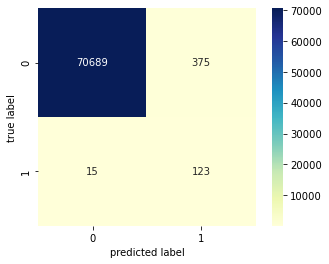

In [237]:
#plot the confusion matrix
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu")
plt.xlabel('predicted label')
plt.ylabel('true label')

The precision score is now shockingly only 0.25, which is not acceptable. It seems like scoring on recall forces the model to search the best parameters for the highest recall but evidentally failed on precision. It is clear that we need to change our strategy. Since f1 score is calculated from the harmonic mean of the precision and recall and f2 score is the weighted harmonic mean of the precision and recall (more weights are given to recall), we will score on f1 and f2 to see the results.
For more information on f1, f2, and f0.5: https://docs.h2o.ai/driverless-ai/latest-stable/docs/userguide/scorers.html

Reproduce the same process but scoring on f1 instead of recall.

In [160]:
#Same process but score on f1 instead
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='f1',
                        return_train_score=True)
grid_imba.fit(X_train, y_train);

In [161]:
grid_imba.best_params_

{'randomforestclassifier__max_depth': 14,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__random_state': 13}

In [162]:
grid_imba.best_score_

0.7882657627665843

As scoring set to recall, the GridSearchCV provides the best setup:

     'randomforestclassifier__max_depth': 14,
 
     'randomforestclassifier__n_estimators': 100,
 
     'randomforestclassifier__random_state': 13

In [197]:
#plug in the best parameters into a new estimater
rf_opt = RandomForestClassifier(n_estimators=100, max_depth=14, random_state=13)

In [198]:
pipeline_opt = make_pipeline(SMOTE(random_state=42), rf_opt)

In [199]:
pipeline_opt.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=14, random_state=13))])

In [200]:
predicted_opt = pipeline_opt.predict(X_test)

In [212]:
print('Classification report:\n', classification_report(y_test, predicted_opt))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted_opt)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71064
           1       0.75      0.86      0.80       138

    accuracy                           1.00     71202
   macro avg       0.88      0.93      0.90     71202
weighted avg       1.00      1.00      1.00     71202

Confusion matrix:
 [[71025    39]
 [   19   119]]


Text(83.40000000000006, 0.5, 'true label')

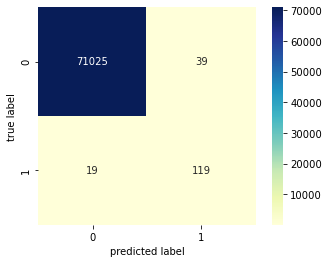

In [217]:
#plot the confusion matrix
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu")
plt.xlabel('predicted label')
plt.ylabel('true label')

In [218]:
#Same process but score on f2 instead
#import scorer maker and fbeta_score ---> allow us to personalize our f-score
from sklearn.metrics import make_scorer,fbeta_score
def f2_func(y_true, y_pred):
    f2_score = fbeta_score(y_true, y_pred, beta=2)
    return f2_score

def my_f2_scorer():
    return make_scorer(f2_func)

new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring=my_f2_scorer(),
                        return_train_score=True)
grid_imba.fit(X_train, y_train);

In [219]:
grid_imba.best_params_

{'randomforestclassifier__max_depth': 14,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__random_state': 13}

In [220]:
grid_imba.best_score_

0.8097458290293706

Reset scoring to f2 suprisingly yield the same result as f1. 

    'randomforestclassifier__max_depth': 14,
 
    'randomforestclassifier__n_estimators': 100,
 
    'randomforestclassifier__random_state': 13.

We will not proceed with confusion matrix and classification report at this point, since it will return the same results as f1.

# PR-curve and ROC-AUC

Now we have found the best parameters for our model:

    'randomforestclassifier__max_depth': 14,

    'randomforestclassifier__n_estimators': 100,

    'randomforestclassifier__random_state': 13.
    
It is time to proceed with ploting the precision-recall curve and ROC. In addition, we can calculate the area under the ROC curve to see how good/bad our model is.

In [242]:
#Use the best parameters to repulicate the random forest model
kf = StratifiedKFold(n_splits=5)
rf_best = RandomForestClassifier(max_depth=14, n_estimators=100, random_state=13)
pipeline_rf_best = Pipeline([('Preprocessing', SMOTE(random_state=42)),('clf',rf_best)])
pipeline_rf_best.fit(X_train, y_train)
predicted_opt = rf_best.predict(X_test)

### PR curve

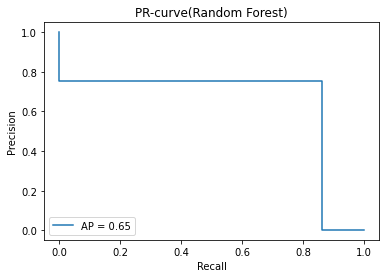

In [243]:
#Plot PR-curve
#Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted_opt)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, predicted_opt)

# Plot the recall precision tradeoff
disp = PrecisionRecallDisplay(precision, recall, average_precision = average_precision)
disp.plot()
plt.title("PR-curve(Random Forest)")
plt.show()

### ROC curve and AUC

In [244]:
probs = rf_best.predict_proba(X_test)

In [245]:
print(roc_auc_score(y_test, probs[:,1]))

0.9838607411649348


In [250]:
print("We are reaching AUC = " +str(round(roc_auc_score(y_test, probs[:,1]), ndigits=2)) +" with this model.") 

We are reaching AUC = 0.98 with this model.


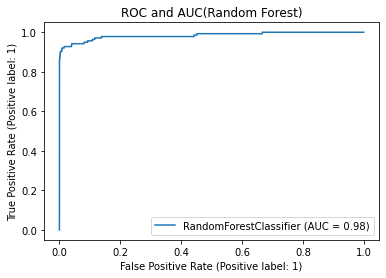

In [252]:
#plot the roc curve
plot_roc_curve(rf_best, X_test, y_test) 
plt.title("ROC and AUC(Random Forest)")
plt.show()

# Conclusion

We built a model that predicts fraud class (fraudulent or non-fraudulent) from given credit card fraud data. Such information can be a great asset to fraud prevention and risk management in many corporations as fraud attacks continue to increase in volume and techniques. 

With the second approach, we are able to reach a recall score of 0.86 without sacrificing the precision of the final model. This model, built on random forest classifier, was optimized by GridSearchCV and incorporate with methods such as: StratifiedKFold cross validation and SMOTE(oversampling). Besides 0.87 on recall, the final model achieves a ROC-AUC of 0.98.

# Final Thoughts
1. The long run time with the final oversampled random forest approach - it might not be the best model for production.
2. There is definitely still room for improvements. Tuning more hyper-parameters could yield better results, but the long run time really constrained the number of trials.

Remarks: 
* cross_val_score only accept one scoring, while cross_validate can accept and return multiple scores.